In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sympy import *
init_printing(use_unicode=True)

In [2]:
def gaussian(x, A, mu, sigma):
    """
    Gaussian function.

    Parameters:
        x (array_like): The input value.
        A (float): The amplitude of the Gaussian function.
        mu (float): The mean (average) of the distribution.
        sigma (float): The standard deviation (a measure of the spread) of the distribution.

    Returns:
        float: The value of the Gaussian function at x.
    """
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))


In [3]:
L = 1.0  # Length of the domain
hx = 0.01  # Spatial grid spacing
Nx = int(L / hx) + 1  # Number of spatial grid points

x_arr = np.linspace(0, L, Nx)

In [4]:
def beta_U(x):
    return gaussian(x, A=-2, mu=L/4, sigma=0.1)+gaussian(x, A=-3, mu=0.8, sigma=0.2)

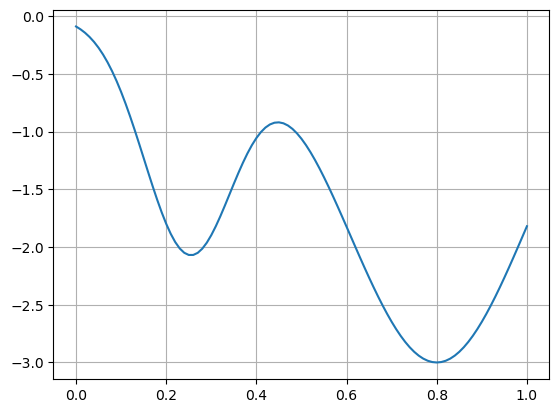

In [5]:
plt.plot(
    x_arr, beta_U(x_arr)
)
plt.grid()

In [6]:
# Define symbols
x = symbols('x ')

A1 = -2
mu1 = L/4
sigma1 = 0.1

A2 = -3
mu2 = 0.8
sigma2 = 0.2

# Defined Gaussian function
gaus_func1 = A1 *exp(-(x - mu1)**2 / (2 * sigma1**2))
gaus_func2 = A2 *exp(-(x - mu2)**2 / (2 * sigma2**2))

In [7]:
beta_U_epr = gaus_func1+gaus_func2
beta_U_epr

In [8]:
# Calculate the derivative
beta_Up_epr = diff(beta_U_epr, x)
beta_Up_epr

In [9]:
# Calculate the derivative
beta_Upp_epr = diff(beta_Up_epr, x)
beta_Upp_epr

In [10]:
beta_U_arr = np.zeros(x_arr.size)
beta_Up_arr = np.zeros(x_arr.size)
beta_Upp_arr = np.zeros(x_arr.size)

for i in range(x_arr.size):
    beta_U_arr[i] = beta_U_epr.subs(x, x_arr[i])
    beta_Up_arr[i] = beta_Up_epr.subs(x, x_arr[i])
    beta_Upp_arr[i] = beta_Upp_epr.subs(x, x_arr[i])
    

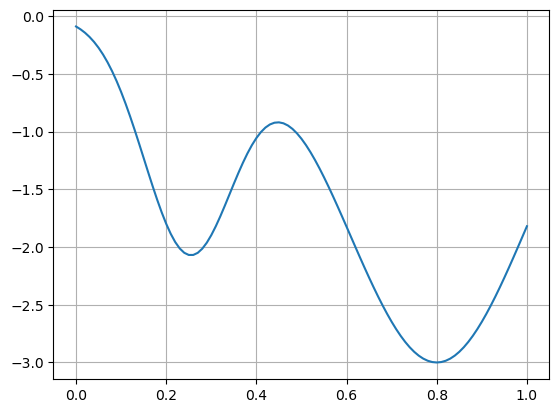

In [11]:
plt.plot(x_arr, beta_U_arr)
plt.grid()

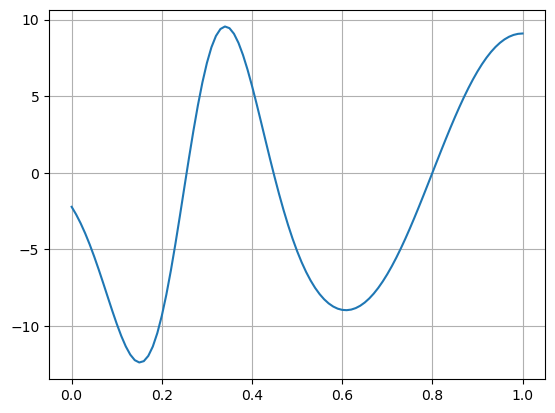

In [12]:
plt.plot(x_arr, beta_Up_arr)
plt.grid()

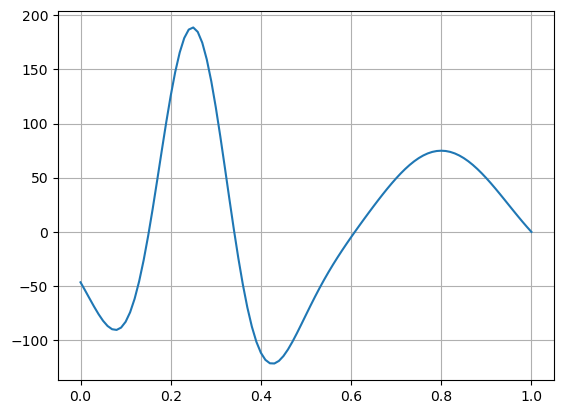

In [13]:
plt.plot(x_arr, beta_Upp_arr)
plt.grid()

In [14]:
print(beta_Up_epr)

-3*(20.0 - 25.0*x)*exp(-12.5*(x - 0.8)**2) - 2*(25.0 - 100.0*x)*exp(-50.0*(x - 0.25)**2)


In [15]:
print(beta_Upp_epr)

-2*10000.0*(0.25 - x)**2*exp(-50.0*(x - 0.25)**2) - 3*625.0*(0.8 - x)**2*exp(-12.5*(x - 0.8)**2) + 200.0*exp(-50.0*(x - 0.25)**2) + 75.0*exp(-12.5*(x - 0.8)**2)


 ### Define gaussian like form: $ Ae^{c(x-\mu)^2} $, in order to write beta_Up and beta_Upp function
 
 def gaussian_like_func(x, A, c, mu):
    return A*np.exp(c*(x-mu)**2)

def beta_Up(x):
    result = gaussian_like_func(
        x, A=-3*(20.0 - 25.0*x), c=-12.5, mu= 0.8)

In [16]:
def beta_Up(x):
    result = -3*(20.0 - 25.0*x)*np.exp(-12.5*(x - 0.8)**2)-2*(25.0 - 100.0*x)*np.exp(-50.0*(x - 0.25)**2)
    return result

def beta_Upp(x):
    result = -2*10000.0*(0.25 - x)**2*np.exp(
        -50.0*(x - 0.25)**2
    ) - 3*625.0*(0.8 - x)**2*np.exp(
        -12.5*(x - 0.8)**2
    ) + 200.0*np.exp(
        -50.0*(x - 0.25)**2
    ) + 75.0*np.exp(
        -12.5*(x - 0.8)**2)
    return result


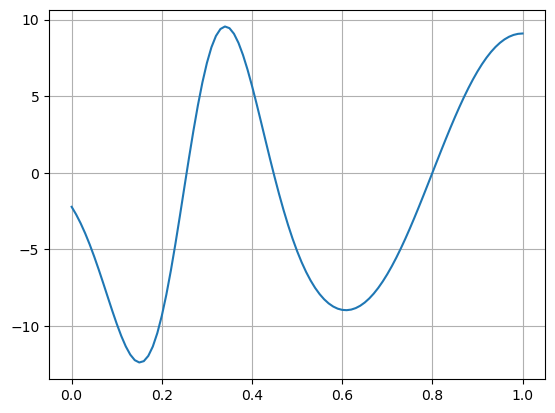

In [17]:
plt.plot(x_arr, beta_Up(x_arr))
plt.grid()

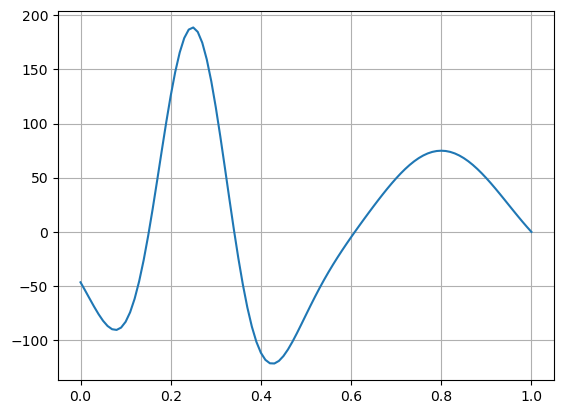

In [18]:
plt.plot(x_arr, beta_Upp(x_arr))
plt.grid()